In [1]:
import uproot
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
run_number = 65
summaryfile_path = "LOG/"+str(run_number)+"/"
rootfile_path = "ROOT/"+str(run_number)+"/"
rootfile_filepath = rootfile_path+os.listdir(rootfile_path)[0]
rootfile = uproot.open(rootfile_filepath)

In [5]:
sqrt_s = 0 
with open(summaryfile_path+"Summary.txt") as dc:
		for line in dc: 
			if line.startswith("ECMS"):
				sqrt_s = float(line.split()[1])

In [6]:
events = rootfile["LHEF"]

In [8]:
branchlist = [
 'Particle.PID',
 'Particle.Px',
 'Particle.Py',
 'Particle.Pz',
 'Particle.E',
 'Particle.M',
 'Particle.PT',
 'Particle.Eta',
 'Particle.Phi',
 'Particle.Rapidity']
events_df = events.pandas.df(branchlist,flatten=True)
events_df

Particle.PID  Particle.Px  Particle.Py  Particle.Pz  \
entry subentry                                                        
0     0                 2212     0.566003     0.004495  6518.521900   
      1                 2212    -0.106344     0.407668 -6220.121100   
      2                  211     0.358468    -0.613097     1.564604   
      3                  111    -0.260707    -0.757954    17.113280   
      4                -2112    -0.359645     0.842698    45.000781   
      5                  111    -0.960251     0.703164     4.506802   
      6                  211     0.225894     0.042343     0.890828   
      7                  211     2.405311     0.269478    -0.809347   
      8                  111    -0.112314    -0.025526     0.091226   
      9                 -211     0.883492    -0.134070    -1.092595   
      10                 321    -0.156694    -0.279756    -0.167698   
      11                 111     0.061115    -0.067631    -0.296232   
      12                 111     1.718966    -2.934951    -9.548382   
      13                -211     0.050818    -0.247414    -1.256790   
      14                 211    -0.409258    -0.172757    -5.559106   
      15                -211     0.072840    -0.154341    -5.616252   
      16                -211    -0.651064     0.095607    -0.144653   
      17                2112     1.262989    -1.994657    -1.396401   
      18               -2212     1.126510    -4.431064    -2.164843   
      19                 111    -0.532735    -0.065613     0.801055   
      20                 211    -4.474383    -2.168947     3.873178   
      21                 211    -5.379070    -4.580281     5.289893   
      22                 111    -0.936906    -0.518098     1.013655   
      23                 211     0.061821     0.121906     0.444862   
      24                -211     0.139740    -0.337203     0.337061   
      25                 111    -0.692692    -0.307753    -0.237721   
      26               -2212    -0.543756    -1.576112     0.021816   
      27                -211     0.354735    -0.396091    -0.142863   
      28                 211    -0.037124     0.031081    -0.372468   
      29                2112     0.935000     6.025447    -5.453411   
...                      ...          ...          ...          ...   
9999  52                -211     0.637097     1.123798    -4.565400   
      53                 111     0.482150     0.690211    -3.862319   
      54                  16     0.544032     0.370551    -1.703868   
      55                 211    -0.299178     0.126734     0.292801   
      56                 211    -0.155753     0.389755     2.249300   
      57                -211    -0.194541    -0.075877     2.929882   
      58                 111    -0.087520    -0.076836     1.190097   
      59                -211     0.180376    -0.290782    16.450832   
      60                 111    -0.156907     0.343612    20.215160   
      61                 111     0.048901     0.137610    12.720117   
      62                  22     0.016317    -0.012283     0.202806   
      63                 111    -1.068156     1.692122    10.854469   
      64                 111     0.270640     1.116446     0.460917   
      65                 111    -0.359783     0.998672     1.856174   
      66                2112     0.092048    -0.602808   -13.360981   
      67                 111    -0.259238    -0.146301    -3.221195   
      68               -2112     0.546805    -0.045551   -16.829214   
      69                 211    -0.120671     0.056893    -1.770863   
      70                 211     0.371514     0.464929   -39.021568   
      71                -211    -0.004130     0.265719   -21.930050   
      72                 111    -0.153878     0.077033   -10.061220   
      73                 211    -0.036982    -0.429759    -3.910968   
      74                -211    -1.591708     0.272726   -14.240382   
      75                -321    -6.93051

In [ ]:
nParticles = []
for entry,entry_df in events_df.groupby(level=0):
    nParticles.append(len(entry_df))
    PIDs = entry_df[["Particle.PID"]].to_numpy()
    if not all(elem in PIDs for elem in [6,-6,2212]):
        print(PIDs)
        events_df = events_df.drop(entry)
        print("Dropping entry: "+str(entry))

In [16]:
tops = events_df[ events_df["Particle.PID"] == 6]
atops = events_df[ events_df["Particle.PID"] == -6]
tops_lorentzVector = tops[["Particle.Px","Particle.Py","Particle.Pz","Particle.E"]].to_numpy()
atops_lorentzVector = atops[["Particle.Px","Particle.Py","Particle.Pz","Particle.E"]].to_numpy()
ttbars_lorentzVector = tops_lorentzVector + atops_lorentzVector
ttbars_masses = np.sqrt( ttbars_lorentzVector[:,3]**2 - (ttbars_lorentzVector[:,0]**2 + ttbars_lorentzVector[:,1]**2 + ttbars_lorentzVector[:,2]**2) )
protonP = events_df[ (events_df["Particle.PID"] == 2212) & (events_df["Particle.Pz"] > 0) ]
protonN = events_df[ (events_df["Particle.PID"] == 2212) & (events_df["Particle.Pz"] < 0) ]
protonP_xi = (1 - protonP[["Particle.Pz"]].to_numpy()/(sqrt_s/2))[:,0]
protonN_xi = (1 + protonN[["Particle.Pz"]].to_numpy()/(sqrt_s/2))[:,0]
m_total = np.sqrt((sqrt_s**2) * protonP_xi * protonN_xi)
m_frac = ttbars_masses / m_total

## Plot number of particles

Text(0.5, 0, 'Number of Particles')

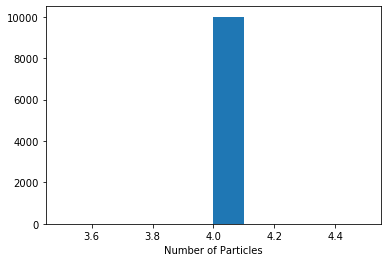

In [20]:
fig, ax = plt.subplots()
h_mtt =ax.hist(nParticles, bins=10)
plt.xlabel('Number of Particles')

## Plot m_tt

Text(0.5, 0, 'm_tt (GeV)')

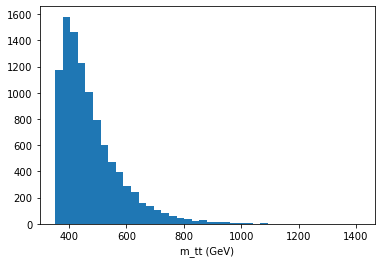

In [21]:
fig, ax = plt.subplots()
h_mtt =ax.hist(ttbars_masses, bins=40)
plt.xlabel('m_tt (GeV)')

## Plot m_total

Text(0.5, 0, 'm_total (GeV)')

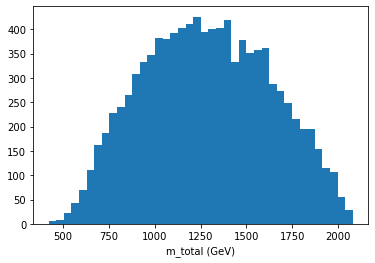

In [33]:
fig, ax = plt.subplots()
h_m_total =ax.hist(m_total, bins=40)
plt.xlabel('m_total (GeV)')

## Plot m_frac (a.k.a. sqrt(beta_1*beta_2)

Text(0.5, 0, 'm_frac')

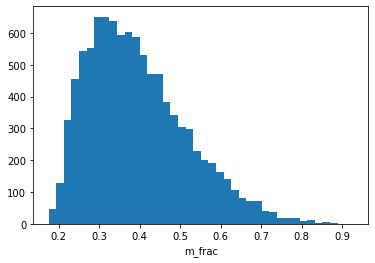

In [35]:
fig, ax = plt.subplots()
h_m_frac =ax.hist(m_frac, bins=40)
plt.xlabel('m_frac')